<a href="https://colab.research.google.com/github/vbloise3/Data_Science/blob/master/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 P( both | older): 0.5007089325501317
 P( both | either):  0.3311897106109325


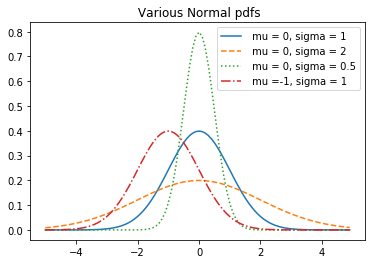

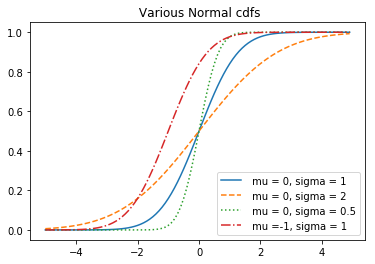

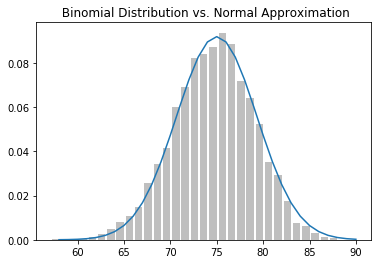

In [6]:
import enum, random # An Enum is a typed set of enumerated values. We can use them 
# to make our code more descriptive and readable.
import matplotlib.pyplot as plt
from collections import Counter

class Kid( enum.Enum): 
  BOY = 0 
  GIRL = 1

def random_kid()-> Kid: 
  return random.choice([ Kid.BOY, Kid.GIRL])

both_girls = 0 
older_girl = 0 
either_girl = 0

random.seed( 0)

for _ in range( 10000): 
  younger = random_kid() 
  older = random_kid() 
  if older == Kid.GIRL: 
    older_girl += 1 
  if older == Kid.GIRL and younger == Kid.GIRL: 
    both_girls += 1 
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

print(" P( both | older):", both_girls / older_girl) # 0.514 ~ 1/2 
print(" P( both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

# normal distribution
import math 
SQRT_TWO_PI = math.sqrt( 2 * math.pi)

def normal_pdf( x: float, mu: float = 0, sigma: float = 1)-> float: 
  return (math.exp(-( x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

xs = [x / 10.0 for x in range(-50, 50)] 
plt.plot( xs,[ normal_pdf( x, sigma = 1) for x in xs],'-', label =' mu = 0, sigma = 1')
plt.plot( xs,[ normal_pdf( x, sigma = 2) for x in xs],'--', label =' mu = 0, sigma = 2') 
plt.plot( xs,[ normal_pdf( x, sigma = 0.5) for x in xs],':', label =' mu = 0, sigma = 0.5') 
plt.plot( xs,[ normal_pdf( x, mu =-1) for x in xs],'-.', label =' mu =-1, sigma = 1') 
plt.legend() 
plt.title(" Various Normal pdfs") 
plt.show()

def normal_cdf( x: float, mu: float = 0, sigma: float = 1)-> float: 
  return (1 + math.erf(( x-mu) / math.sqrt( 2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)] 
plt.plot( xs,[ normal_cdf( x, sigma = 1) for x in xs],'-', label =' mu = 0, sigma = 1') 
plt.plot( xs,[ normal_cdf( x, sigma = 2) for x in xs],'--', label =' mu = 0, sigma = 2') 
plt.plot( xs,[ normal_cdf( x, sigma = 0.5) for x in xs],':', label =' mu = 0, sigma = 0.5') 
plt.plot( xs,[ normal_cdf( x, mu =-1) for x in xs],'-.', label =' mu =-1, sigma = 1') 
plt.legend( loc = 4) # bottom right 
plt.title(" Various Normal cdfs") 
plt.show()

# central limit theorem
def bernoulli_trial( p: float)-> int: 
  """ Returns 1 with probability p and 0 with probability 1-p""" 
  return 1 if random.random() < p else 0

def binomial( n: int, p: float)-> int: 
  """ Returns the sum of n bernoulli( p) trials""" 
  return sum( bernoulli_trial( p) for _ in range( n))

def binomial_histogram( p: float, n: int, num_points: int)-> None: 
  """ Picks points from a Binomial( n, p) and plots their histogram""" 
  data = [binomial( n, p) for _ in range( num_points)]
  # use a bar chart to show the actual binomial samples
  histogram = Counter( data) 
  plt.bar([ x-0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color =' 0.75')
  mu = p * n 
  sigma = math.sqrt( n * p * (1-p))
  # use a line chart to show the normal approximation
  xs = range( min( data), max( data) + 1) 
  ys = [normal_cdf( i + 0.5, mu, sigma)-normal_cdf( i-0.5, mu, sigma) for i in xs] 
  plt.plot( xs, ys) 
  plt.title(" Binomial Distribution vs. Normal Approximation") 
  plt.show()

binomial_histogram( 0.75, 100, 10000)